# Esercitazione 11  <br>
# <span style="color:orange"> Keras - Neural Network regression </span>

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit 

We start by considering the very simple case:
$$
f(x)=2x+1
$$

## Esercizio 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

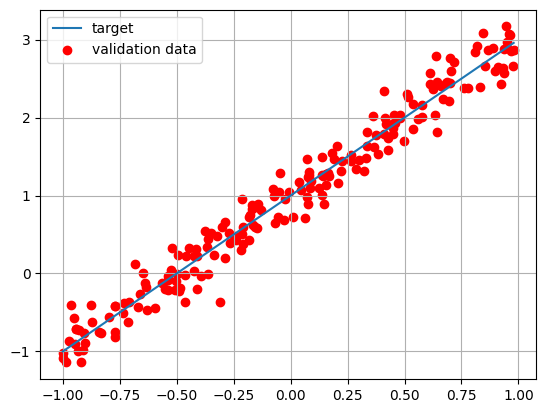

In [20]:
import numpy as np

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)    #numero dati per training, N_train
x_valid = np.random.uniform(-1, 1, 200)     #numero dati validation, N_valid
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fit the model using training dataset

# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,       
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
63/63 [==============================] - 0s 4ms/step - loss: 1.9755 - mse: 1.9755 - val_loss: 1.0025 - val_mse: 1.0025
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7121 - mse: 0.7121 - val_loss: 0.4096 - val_mse: 0.4096
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3062 - mse: 0.3062 - val_loss: 0.1908 - val_mse: 0.1908
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1483 - mse: 0.1483 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0839 - mse: 0.0839 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0524 - val_mse: 0.0524
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0417 - mse: 0.04

In [23]:
# return weights and biases
model.get_weights()

[array([[2.0004723]], dtype=float32), array([0.9912222], dtype=float32)]

In [24]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print("Model evaluated with valid data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print("Model evaluated with target data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 4ms/step - loss: 0.0427 - mse: 0.0427

Model evaluated with valid data
Test loss: 0.04267941415309906
Test accuracy: 0.04267941415309906
7/7 [==============================] - 0s 3ms/step - loss: 7.7108e-05 - mse: 7.7108e-05

Model evaluated with target data
Test loss: 7.710797945037484e-05
Test accuracy: 7.710797945037484e-05


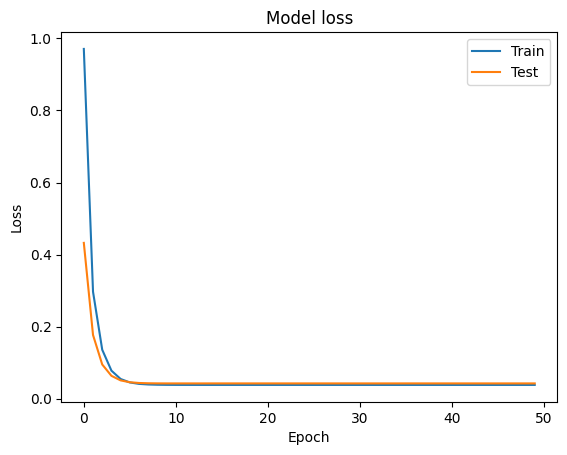

In [79]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


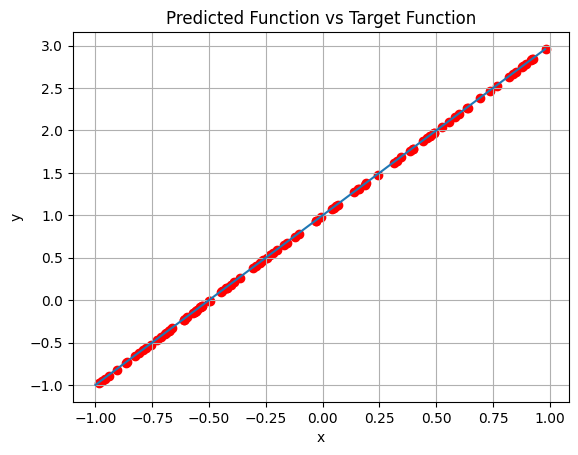

In [25]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Predicted Function vs Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Aumentando il numero di dati per il training $N_{train}$ e il numero di epoche aumenta la precisione del fit. 

Introducendo un rumore gaussiano $ \sigma$, la precisione del modello si riduce. Tuttavia con abbastanza dati il modello riesce a fare previsioni che seguono un andamento corretto anche con grande rumore. 

## Esercizio 2.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


# target parameters of f(x) = a*x^3 + b*x^2 + c*x +d
a = 3 
b = -2
c = -3
d = 4

# Generate training inputs
np.random.seed(0)
Ntrain = 5000
Nvalid = 500
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

sigma = 0.1  # Noise standard deviation
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma)
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

# Compose the NN model
model = keras.Sequential([
    keras.layers.Dense(16, activation='tanh', input_shape=(1,)),    #3 layers, with 16 then 8 neurons then 1.
    keras.layers.Dense(8, activation='tanh'),                       #activation function = relu
    keras.layers.Dense(1)
])

# Compile the model choosing optimizer, loss, and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])         

# Fit the model using training dataset
# Over 50 epochs of 32 batch size each
# Report training progress against validation data
batch = 32
epoch = 50
history = model.fit(x=x_train, y=y_train,
                    batch_size=batch, epochs=epoch,
                    shuffle=True,  # A good idea is to shuffle input before each epoch
                    validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 [==============================] - 1s 4ms/step - loss: 0.9060 - mse: 0.9060 - val_loss: 0.3822 - val_mse: 0.3822
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.3463 - val_mse: 0.3463
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3126 - mse: 0.3126 - val_loss: 0.3007 - val_mse: 0.3007
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.2511 - mse: 0.2511 - val_loss: 0.2122 - val_mse: 0.2122
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1576 - mse: 0.1576 - val_loss: 0.1205 - val_mse: 0.1205
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0871 - mse: 0.0871 - val_loss: 0.0725 - val_mse: 0.0725
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 8/50
157/157 [==============================] - 1s 4ms/step - loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0132 - mse: 0.0132

Model vs valid
Test loss: 0.013174869120121002
Test accuracy: 0.013174869120121002
16/16 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.0033

Model vs target
Test loss: 0.0033344507683068514
Test accuracy: 0.0033344507683068514


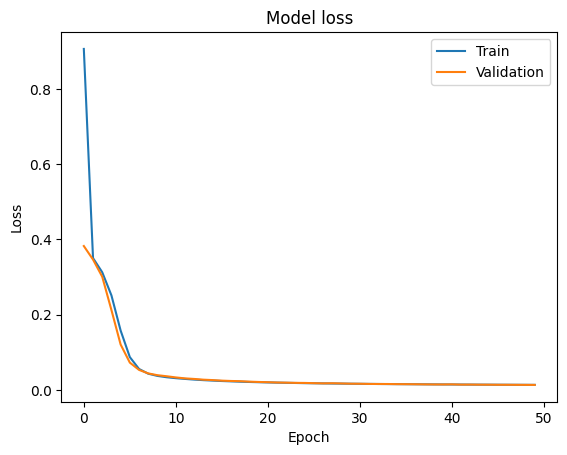

In [20]:
# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs target')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


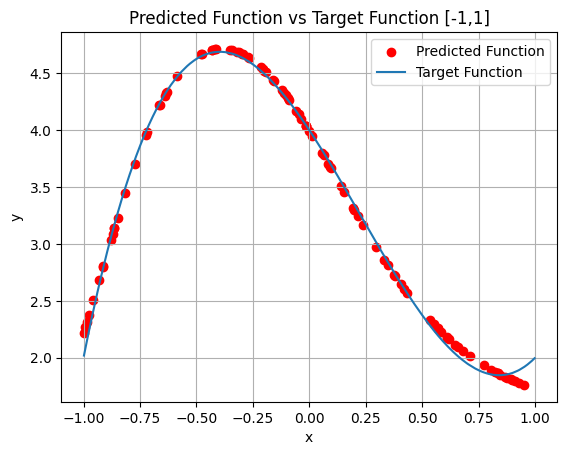

16/16 [==============================] - 0s 3ms/step - loss: 0.0232 - mse: 0.0232

Model vs valid
Test loss: 0.023216580972075462
Test accuracy: 0.023216580972075462
4/4 [==============================] - 0s 2ms/step


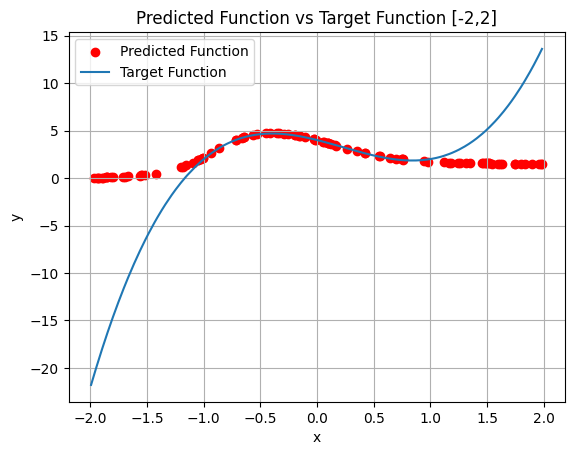

16/16 [==============================] - 0s 3ms/step - loss: 2.9103 - mse: 2.9103

Model vs valid
Test loss: 2.9102563858032227
Test accuracy: 2.9102563858032227


In [21]:
############################ Predicted Function vs Target Function on [-1,1]

x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Predicted Function')
plt.plot(x_valid, y_target, label='Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted Function vs Target Function [-1,1]')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

############################ Predicted Function vs Target Function on [-2,2]

x_valid = np.random.uniform(-2, 2, Nvalid)
x_valid.sort()

# Target function f(x) = a*x^3 + b*x^2 + c*x + d
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='Predicted Function')
plt.plot(x_valid, y_target, label='Target Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted Function vs Target Function [-2,2]')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Fuori dall'intervallo in cui è stato fittato il modello fallisce nel produrre predizioni accurate. Come nell'esercizio precedente, si nota come aumentando il numero di epoche di training e il numero di dati aumenti anche la precisione del modello. Si nota anche come il rumore Gaussiano non abbia un grande impatto sul modello. 

Il numero di layer e di neuroni per ognuna di esse è stato fissato a 3 layer con rispettivamente 16, 8 e 1 neurone, seguendo l'osservazione che aumentando eccessivamente il numero di parametri il modello comincia ad overfittare la funzione. Sono state provate diverse funzioni di attivazione: si è notato come la reLu sia la migliore insieme a tanh, superando la sigmoide.

Per quanto riguarda l'ottimizzatore, si nota come SGD e Adam riescano a fittare bene la funzione, mentre Adagrad non sia stato in grado di farlo. I dati prodotti con quest'ultimo non seguono l'andamento della funzione target. 

Usare la loss function MSE (Mean Square Error) o la MAE (Mean Absolute Error) non produce differenze significative nel fit.

## Esercizio 11.3

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Generate training inputs
np.random.seed(0)
Ntrain = 6000
Nvalid = 600

x_train = np.random.uniform(-1.5, 1.5, Ntrain)
x_valid = np.random.uniform(-1.5, 1.5, Nvalid)
x_valid.sort()

y_train = np.random.uniform(-1.5, 1.5, Ntrain)
y_valid = np.random.uniform(-1.5, 1.5, Nvalid)
y_valid.sort()

# Target function f(x, y) = sin(x^2 + y^2)
z_target = np.sin(x_valid**2 + y_valid**2)

sigma = 0  # Noise standard deviation
z_train = np.sin(x_train**2 + y_train**2) + np.random.normal(0, sigma, size = Ntrain)
z_valid = np.sin(x_valid**2 + y_valid**2 ) + np.random.normal(0, sigma, size = Nvalid)

# Compose the NN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model choosing optimizer, loss, and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Fit the model using training dataset
batch_size = 32
epochs = 50
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
                    batch_size=batch_size, epochs=epochs,
                    validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Epoch 1/50
188/188 [==============================] - 1s 6ms/step - loss: 0.3584 - mse: 0.3584 - val_loss: 0.2984 - val_mse: 0.2984
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 5/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 9.6946e-04 - mse: 9.6946e-04 - val_loss: 8.7632e-04 - val_mse: 8.7632e-04
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 6.9942e-04 - mse: 6.9942e-04 - val_loss: 5.5739e-04 - val_mse: 5.5739e-04
Epoch 8/50
188/188 [========================

19/19 [==============================] - 0s 4ms/step - loss: 1.5659e-04 - mse: 1.5659e-04

Model vs valid
Test loss: 0.00015659119526389986
Test accuracy: 0.00015659119526389986
19/19 [==============================] - 0s 3ms/step - loss: 1.5659e-04 - mse: 1.5659e-04

Model vs target
Test loss: 0.00015659119526389986
Test accuracy: 0.00015659119526389986


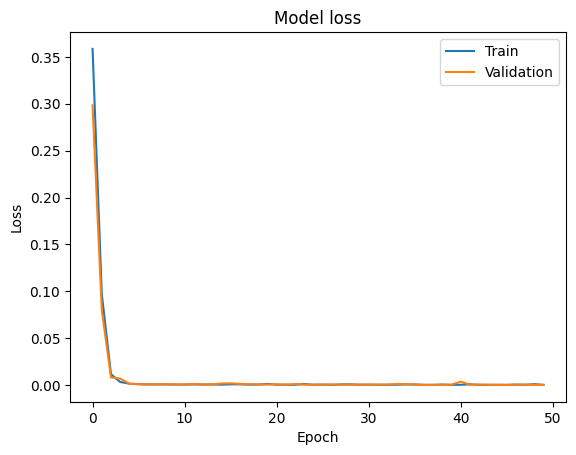

In [106]:
# Evaluate model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size=batch, verbose=1)

# print performance
print()
print('Model vs target')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


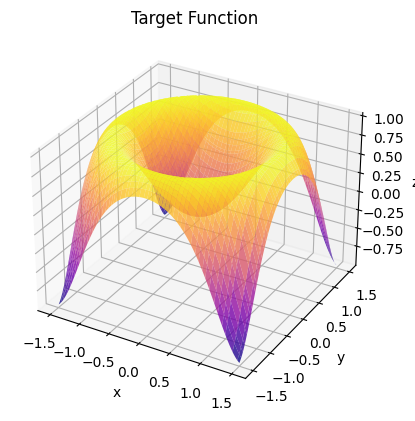

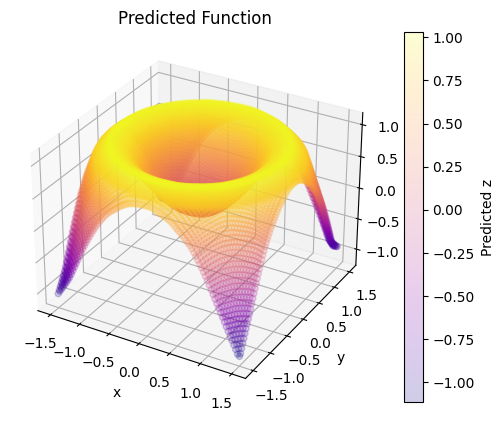

19/19 [==============================] - 0s 3ms/step - loss: 0.0135 - mse: 0.0135

Model vs valid
Test loss: 0.013470732606947422
Test accuracy: 0.013470732606947422


In [108]:
x_valid = np.random.uniform(-1.5, 1.5, Nvalid)
y_valid = np.random.uniform(-1.5, 1.5, Nvalid)
x_valid.sort()
y_valid.sort()
x_grid, y_grid = np.meshgrid(x_valid, y_valid)

z_target = np.sin(x_grid**2 + y_grid**2)

x_predicted = np.linspace(-1.5, 1.5, 100)
y_predicted = np.linspace(-1.5, 1.5, 100)
x_predictedgrid, y_predictedgrid = np.meshgrid(x_predicted, y_predicted)
x_flatpred = x_predictedgrid.flatten()
y_flatpred = y_predictedgrid.flatten()

z_predicted = model.predict(np.column_stack((x_flatpred, y_flatpred)))

# Plot the target function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_target, cmap='plasma', edgecolor='none', alpha=0.8, label='Target Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Target Function') 
plt.show()

# Scatter plot of predicted points with color mapping
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flatpred, y_flatpred, z_predicted, c=z_predicted, cmap='plasma', alpha=0.2, label='Predicted Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Predicted Function')

cbar = fig.colorbar(sc)
cbar.set_label('Predicted z')

plt.show()

# Evaluate the model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Model vs valid')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In tale fit si può aumentare la complessità del modello più dell'esercizio precedente, tuttavia con un numero di parametri eccessivo si osserva comunque l'overfitting. E' stata dunque necessaria la scelta di un numero bilanciato di layer e nodi. Si è visto come, per evitare l'overfitting, sia meglio mettere le layer con più nodi prima di quelle con meno nodi.

Come osservato in precedenza, l'aumento del numero di dati e di epoche di training risulta in un miglioramento della precisione del fit. Si nota invece come l'aggiunta di rumore gaussiano la peggiori in modo evidente.

Adam si è dimostrato migliore nell'ottimizzazione rispetto a SGD e AdaGrad. La loss function MSE ha prodotto risultati migliori rispetto alla MAE.